In [1]:
import pandas as pd
import seaborn as sns
from sklearn import linear_model
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#loading dataset
data = pd.read_csv("weight-height data.csv")

#quick view of dataset
print(data.head())

  Gender     Height      Weight
0   Male  73.847017  241.893563
1   Male  68.781904  162.310473
2   Male  74.110105  212.740856
3   Male  71.730978  220.042470
4   Male  69.881796  206.349801


In [3]:
#1 pound = 0.453592 kg 
#present weight is in pounds : converting to kg for feasibility

Weight_Kg = []
for i in range(len(data.Weight)):
    raw= (data.Weight[i])*0.453592
    Weight_Kg.append(round(raw,2))

In [4]:
#Adding new column 
data["Weight_Kg"] = Weight_Kg

#Dropping Weight(pound) column
data = data.drop(["Weight"],axis=1)

print(data.head())

  Gender     Height  Weight_Kg
0   Male  73.847017     109.72
1   Male  68.781904      73.62
2   Male  74.110105      96.50
3   Male  71.730978      99.81
4   Male  69.881796      93.60


In [5]:
print(data.shape)

#Renaming Height column
data = data.rename(columns = ({"Height": "Height_inches"}))

print(data.head())

(10000, 3)
  Gender  Height_inches  Weight_Kg
0   Male      73.847017     109.72
1   Male      68.781904      73.62
2   Male      74.110105      96.50
3   Male      71.730978      99.81
4   Male      69.881796      93.60


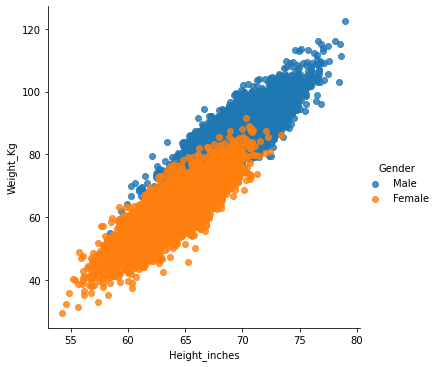

In [6]:
#changing columns to dataframe variables
Weight = pd.DataFrame(data["Weight_Kg"])
Height = pd.DataFrame(data["Height_inches"])
Gender = pd.DataFrame(data["Gender"])


#Visualizing our data
sns.lmplot(x="Height_inches",y="Weight_Kg",hue="Gender",data=data,fit_reg=False);

In [7]:
# #Using multi variate linear regression

#As Gender is a string, linear regression cannot work on string data, converting to int:

Gender_new = []
for i in range(len(data)):
    if data["Gender"][i] == "Male":
        Gender_new.append(0)
    else:
        Gender_new.append(1)
        
data["Gender_new"] = Gender_new

In [8]:
lm2 = linear_model.LinearRegression();

#fitting of data
model2 = lm2.fit(data[["Height_inches","Gender_new"]],Weight);

In [9]:
model2.predict([[67,0]])

array([[79.33750723]])

In [10]:
#Finding coefficient 
model2.coef_

array([[ 2.71108045, -8.78970369]])

In [11]:
#Y-intercept for this model
model2.intercept_

array([-102.30488285])

In [36]:
#Predicting for our database values

predicted_weight = model2.predict(data[["Height_inches","Gender_new"]])
print(predicted_weight)

[[97.9003212 ]
 [84.16839245]
 [98.61357495]
 ...
 [62.05667846]
 [76.06280032]
 [56.84124739]]


In [17]:
#Converting result to DF
weight_predicted = pd.DataFrame(predicted_weight)

#making a Df for consolidated results
result = pd.concat([Height,weight_predicted,Gender],axis=1,keys=["Height","weight_predicted","Gender"])
print(result)

type(result.Height)
type(result.weight_predicted)
type(result.Gender)

result.shape

            Height weight_predicted  Gender
     Height_inches                0  Gender
0        73.847017        97.900321    Male
1        68.781904        84.168392    Male
2        74.110105        98.613575    Male
3        71.730978        92.163570    Male
4        69.881796        87.150288    Male
...            ...              ...     ...
9995     66.172652        68.304797  Female
9996     67.067155        70.729865  Female
9997     63.867992        62.056678  Female
9998     69.034243        76.062800  Female
9999     61.944246        56.841247  Female

[10000 rows x 3 columns]


(10000, 3)

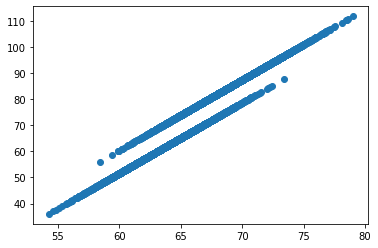

In [26]:
#visualizing database result
plt.scatter(Height,weight_predicted);

In [ ]:
#score for multivariate linear regression : using 2 parameters : gender and height
model2.score(data[["Height_inches","Gender_new"]],Weight)

#The score has improved by 5% with introduction of gender!

In [30]:
#Predicting weight corresponding to Sample data of  Heights and gender:

Sample_height = [68,90,67,78,58]
Sample_gender = ["Male","Female","Female","Male","Female"]

X1 = [[68,0],[90,1],[67,1],[78,0],[58,1]]
X1 = pd.DataFrame(X1)
Y1 = model2.predict(X1)

#Converting output to Dataframe
Y1 = pd.DataFrame(Y1)
Sample_height = pd.DataFrame(Sample_height)
Sample_gender = pd.DataFrame(Sample_gender)

res3 = pd.concat([Sample_height,Y1,Sample_gender],axis=1,keys=["Height_","Predicted_Weight_Kg","Gender_"])
print(res3)

  Height_ Predicted_Weight_Kg Gender_
        0                   0       0
0      68           82.048588    Male
1      90          132.902654  Female
2      67           70.547804  Female
3      78          109.159392    Male
4      58           46.148079  Female


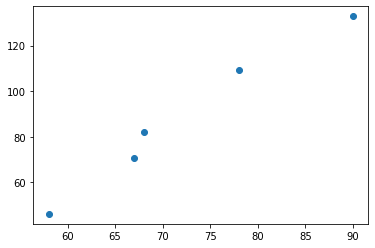

In [29]:
#Visualizing the result for sample data
plt.scatter(Sample_height,Y1);